In [1]:
from ripser import ripser
from persim import plot_diagrams
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from src.ShapeClass import Sphere, Torus, Eight, Cylinder

# plt.style.use("dark_background")

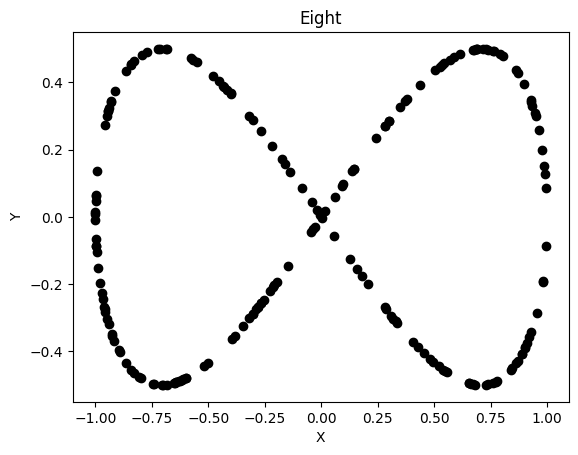

In [2]:
shape = Eight(n=200)
data = shape.generate_data()
shape.plot()

## Compute!


In [3]:
# compute persistent homology using vietoris-rips complexes up to dimension maxdim=
dgms = ripser(data, maxdim=2)["dgms"]

In [4]:
# Specify maximum radius for Rips filtration
# dgms = ripser(data, maxdim=3, thresh=.2)["dgms"]

We can restrict the maximum radius of the VR complex by supplying the argument thresh=r. Certain classes will not be born if their birth time is under the threshold, and other classes will have infinite death times if their ordinary death time is above the threshold


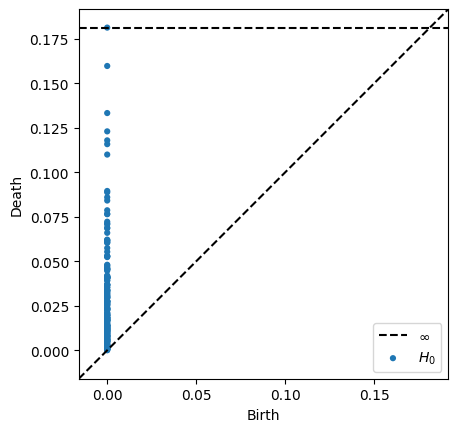

In [5]:
plot_diagrams(dgms, plot_only=[0], show=True)

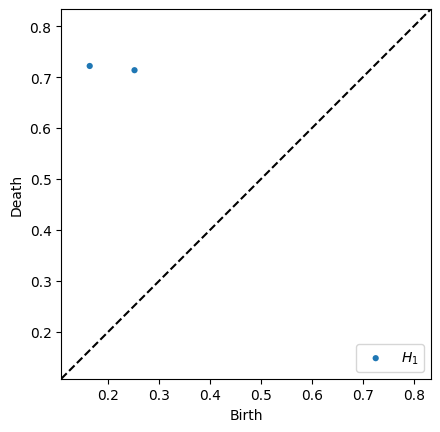

In [6]:
plot_diagrams(dgms, plot_only=[1], show=True)

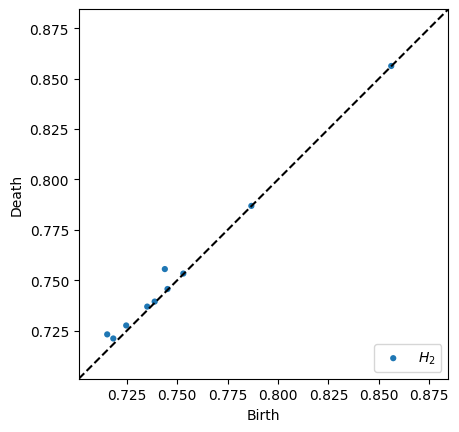

In [7]:
plot_diagrams(dgms, plot_only=[2], show=True)

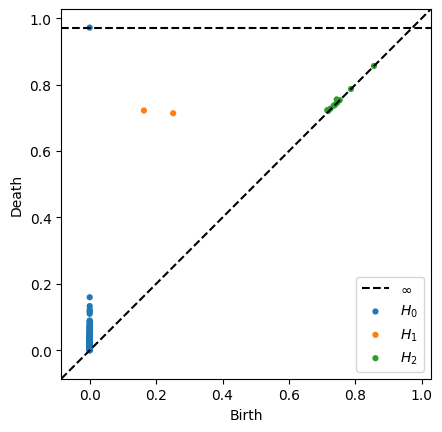

In [8]:
# to see al in one plot
plot_diagrams(dgms, show=True)

Plot options


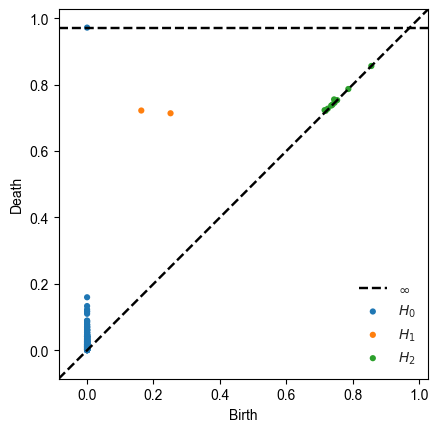

In [9]:
plot_diagrams(dgms, colormap="seaborn")

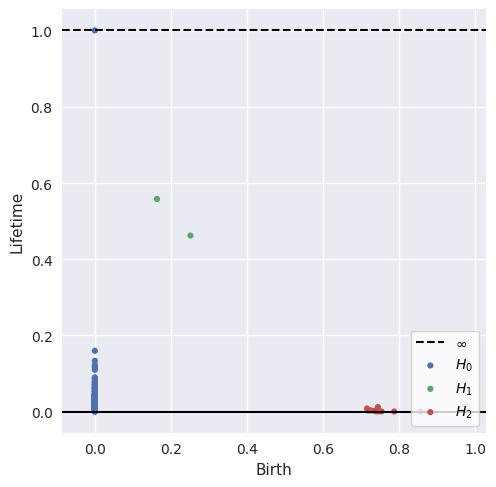

In [10]:
# Plot lifetime of generators¶
plot_diagrams(dgms, lifetime=True)

Using Gudhi library


usetex mode requires TeX.


[1, 0]


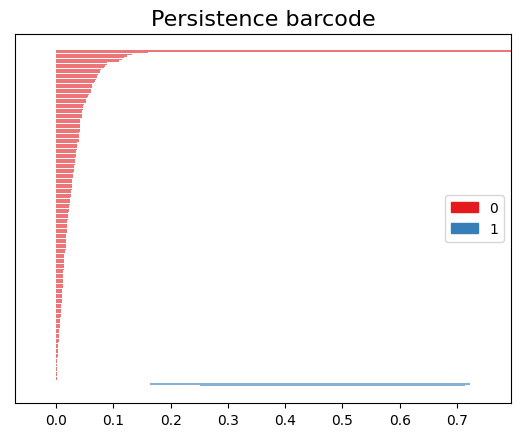

In [11]:
import matplotlib.pyplot as plt
import gudhi


rips_complex = gudhi.RipsComplex(points=data)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence(min_persistence=0.0)

print(simplex_tree.betti_numbers())

gudhi.plot_persistence_barcode(diag)
plt.show()

Example with make_bloobls


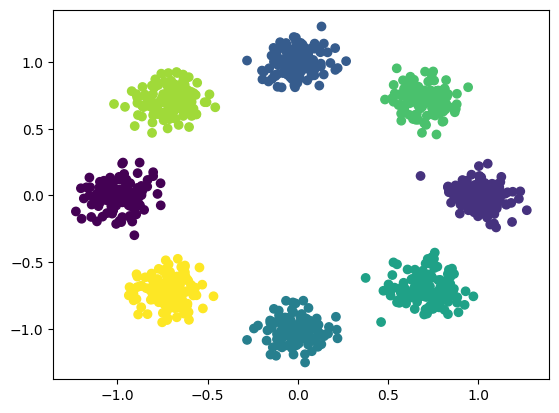

In [32]:
from sklearn.datasets import make_blobs

r2_ = np.sqrt(2)
r2 = (r2_) / 2
centers = np.array(
    [[-1, 0], [1, 0], [0, 1], [0, -1], [r2, -r2], [r2, r2], [-r2, r2], [-r2, -r2]]
)

data, labels = make_blobs(1000, random_state=10, centers=centers, cluster_std=0.1)
data
plt.scatter(data[:, 0], data[:, 1], c=labels)

In [34]:
dgms = ripser(data, maxdim=1, thresh=1.0)["dgms"]

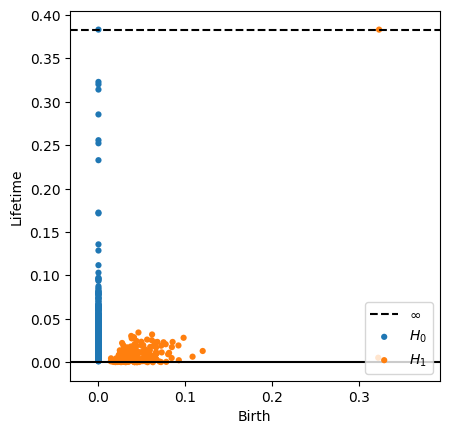

In [35]:
plot_diagrams(dgms, lifetime=True)

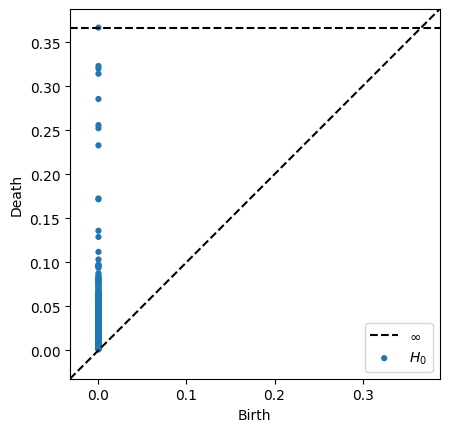

In [16]:
plot_diagrams(dgms, plot_only=[0], show=True)

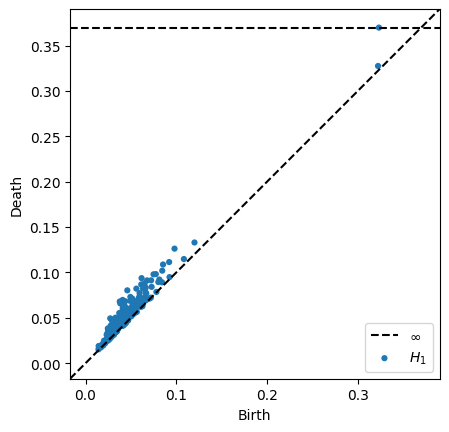

In [17]:
plot_diagrams(dgms, plot_only=[1], show=True)

[1, 0]


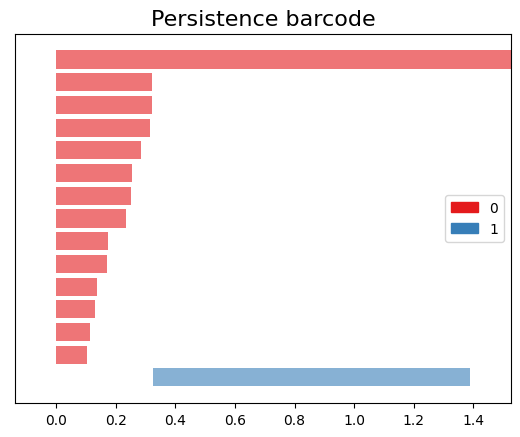

In [33]:
# with gudhi

import matplotlib.pyplot as plt
import gudhi

rips_complex = gudhi.RipsComplex(points=data)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence(min_persistence=0.1)

print(simplex_tree.betti_numbers())

gudhi.plot_persistence_barcode(diag)
plt.show()

With mapper algortihm and make_cicles, make_bloobs


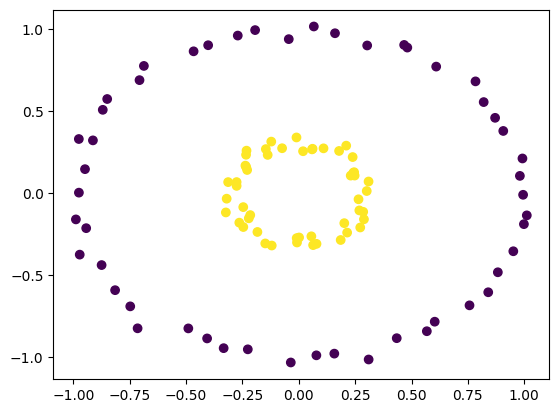

In [22]:
# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets

data, labels = datasets.make_circles(n_samples=100, noise=0.03, factor=0.3)

# data, labels = datasets.make_blobs(n_samples=100, cluster_std=0.2, n_features=5)

plt.scatter(data[:, 0], data[:, 1], c=labels)

In [23]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0, 1])  # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
mapper.visualize(
    graph,
    path_html="make_circles_keplermapper_output.html",
    title="make_circles(n_samples=5000, noise=0.03, factor=0.3)",
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (100, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (100, 2) using lens shaped (100, 2)

Creating 100 hypercubes.

Created 99 edges and 54 nodes in 0:00:00.078152.
Wrote visualization to: make_circles_keplermapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\

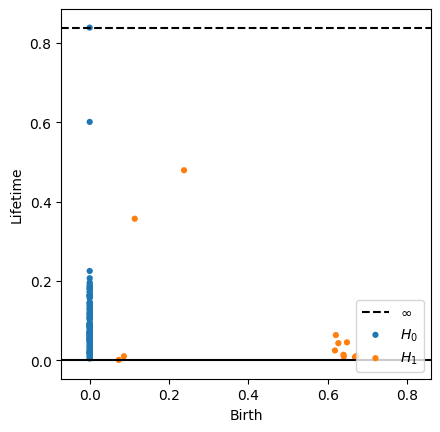

In [24]:
dgms = ripser(data, maxdim=1)["dgms"]

plot_diagrams(dgms, lifetime=True)

[1, 0]


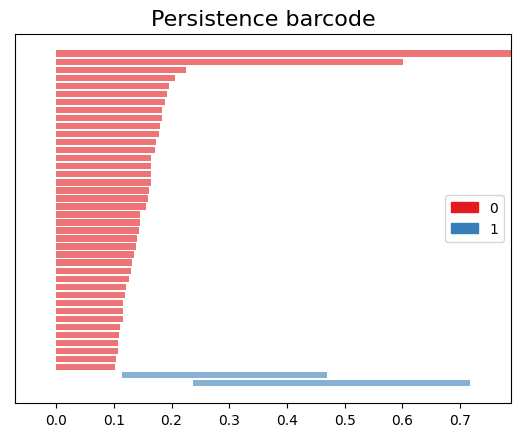

In [30]:
# with gudhi

import matplotlib.pyplot as plt
import gudhi

rips_complex = gudhi.RipsComplex(points=data)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence(min_persistence=0.1)

print(simplex_tree.betti_numbers())

gudhi.plot_persistence_barcode(diag)
plt.show()